In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv(open('Bolt_data_districts.csv'),index_col=0,sep=";")
data.tail()

,Unnamed: 0.1,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,home_address_lng,work_address_lat,work_address_lng,new_id,home_district,pickup_district,destination_district,work_district
65097,65097,58.346,26.726,58.369,26.718000000000004,58.369,26.717,1,07.04.2019 07:46,58.346,26.726,NaN,NaN,8630,Ropka tÃ¶Ã¶stuse,Ropka tÃ¶Ã¶stuse,Vaksali,NaN
65098,65098,58.361,26.698,58.377,26.725,58.377,26.725,1,13.04.2019 07:02,58.361,26.698,58.377,26.73,342,Tammelinna,Tammelinna,Kesklinna,Kesklinna
65099,65099,58.378,26.726999999999997,58.375,26.761999999999997,58.375,26.761999999999997,1,15.04.2019 14:57,58.373,26.734,NaN,NaN,7713,Karlova,Kesklinna,Annelinna,NaN
65100,65100,58.377,26.763,58.408,26.744,NaN,NaN,0,18.04.2019 21:50,58.408,26.744,NaN,NaN,4810,NaN,Annelinna,NaN,NaN
65101,65101,58.357,26.725,58.377,26.721,58.377,26.721,1,30.04.2019 20:54,59.425,24.739,NaN,NaN,16544,NaN,Ropka,Kesklinna,NaN


In [2]:
data["weekday"] = pd.Categorical(pd.to_datetime(data.created).dt.weekday, ordered=True)

In [3]:
data["weekday"].cat.categories = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data.head()

,Unnamed: 0.1,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,home_address_lng,work_address_lat,work_address_lng,new_id,home_district,pickup_district,destination_district,work_district,weekday
0,0,58.390,26.726999999999997,58.378,26.711,58.378,26.711,1,13.04.2019 21:00,59.428,24.74,NaN,NaN,0,NaN,ÃœlejÃµe,Kesklinna,NaN,Saturday
1,1,58.384,26.72,58.399,26.717,58.399,26.715999999999998,1,02.04.2019 22:05,58.399,26.717,NaN,NaN,1,Raadi-KruusamÃ¤e,Kesklinna,Raadi-KruusamÃ¤e,NaN,Monday
2,2,58.349,26.793000000000003,58.375,26.691999999999997,58.375,26.691999999999997,1,07.04.2019 05:38,58.228,26.398000000000003,58.228,26.apr,2,NaN,NaN,Veeriku,NaN,Thursday
3,3,58.382,26.729,58.374,26.758000000000003,58.374,26.758000000000003,1,22.04.2019 18:41,NaN,NaN,NaN,NaN,3,NaN,ÃœlejÃµe,Annelinna,NaN,Monday
4,4,58.384,26.756999999999998,58.378,26.685,58.378,26.685,1,30.04.2019 06:39,58.384,26.756999999999998,58.359,26.67,4,JaamamÃµisa,JaamamÃµisa,Veeriku,NaN,Tuesday


In [4]:
data["time_window"] = pd.Categorical(pd.to_datetime(data.created).dt.hour, ordered=True)
#data.head()


In [5]:
# cleaning process
data['pickup_lng']=data['pickup_lng'].astype(str)
data['destination_lng']=data['destination_lng'].astype(str)
data['home_address_lng']=data['home_address_lng'].astype(str)
data['work_address_lng']=data['work_address_lng'].astype(str)

df1= data[pd.to_numeric(data['pickup_lng'], errors='coerce').notnull()]
df1 = df1[pd.to_numeric(df1['destination_lng'], errors='coerce').notnull()]
df1 = df1[pd.to_numeric(df1['home_address_lng'], errors='coerce').notnull()]
df1 = df1[pd.to_numeric(df1['work_address_lng'], errors='coerce').notnull()]

df1['home_address_lng']=df1['home_address_lng'].astype(float)
df1['destination_lng']=df1['destination_lng'].astype(float)
df1['pickup_lng']=df1['pickup_lng'].astype(float)
df1['work_address_lng']=df1['work_address_lng'].astype(float)

In [6]:
# extract Monday-Thursday data
mon_thu = ["Monday", "Tuesday", "Wednesday", "Thursday"]
data_mon_thu = df1[df1.weekday.isin(mon_thu)]
#data_mon_thu["time_window"].value_counts().sort_index().plot(kind="bar")

In [7]:
# extract Friday-Saturday
fri_sat = ["Friday", "Saturday"]
data_fri_sat = df1[df1.weekday.isin(fri_sat)]
#data_fri_sat["time_window"].value_counts().sort_index().plot(kind="bar")

In [8]:
data_fri_sat.head()

,Unnamed: 0.1,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,home_address_lng,work_address_lat,work_address_lng,new_id,home_district,pickup_district,destination_district,work_district,weekday,time_window
7,7,58.382,26.722,58.374,26.716,58.375,26.718000000000004,1,19.04.2019 23:45,58.357,26.728,58.357,26.73,7,Ropka,Kesklinna,Kesklinna,Ropka,Friday,23
36,36,58.383,26.746,58.351,26.718,58.351,26.718000000000004,1,27.04.2019 07:12,58.351,26.718,58.380,26.72,36,Ropka,ÃœlejÃµe,Ropka,Kesklinna,Saturday,7
42,42,58.384,26.736,58.378,26.722,58.378,26.72,1,05.04.2019 21:02,58.351,26.682,58.346,26.73,42,RÃ¤nilinna,ÃœlejÃµe,Kesklinna,Ropka tÃ¶Ã¶stuse,Saturday,21
43,43,58.378,26.726,58.378,26.682,58.378,26.682,1,19.04.2019 18:29,59.428,24.625,59.437,24.87,43,NaN,Kesklinna,Veeriku,NaN,Friday,18
50,50,58.367,26.736,58.380,26.724,58.379,26.721999999999998,1,20.04.2019 16:49,58.367,26.735,58.373,26.72,50,Karlova,Karlova,Kesklinna,Kesklinna,Saturday,16


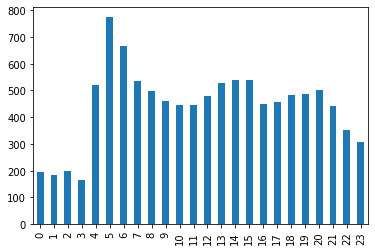

In [9]:
data_mon_thu["time_window"].value_counts().sort_index().plot(kind="bar")

In [10]:
# predict home
# train set
data_mon_thu_train= data_mon_thu[data_mon_thu["home_district"].notnull()]
data_fri_sat_train= data_fri_sat[data_fri_sat["home_district"].notnull()]

# further breakdown to time base
data_mon_thu_morning_train=data_mon_thu_train[(data_mon_thu_train['time_window'] >=  4) & (data_mon_thu_train['time_window'] <= 9)]
data_mon_thu_evening_train=data_mon_thu_train[(data_mon_thu_train['time_window'] >=  16) & (data_mon_thu_train['time_window']  <=20)]

data_fri_sat_morning_train=data_fri_sat_train[(data_fri_sat_train['time_window'] >=  5) & (data_fri_sat_train['time_window']  <= 10)]
data_fri_sat_evening_train=data_fri_sat_train[(data_fri_sat_train['time_window'] >=  18) & (data_fri_sat_train['time_window']  <= 23)]

#random dataset
#data_mon_thu_random1=data_mon_thu_train[(data_mon_thu_train['time_window'] >  22) & (data_mon_thu_train['time_window']  < 24)]
#data_mon_thu_random2=data_mon_thu_train[(data_mon_thu_train['time_window'] >  0) & (data_mon_thu_train['time_window']  < 6)]
#data_mon_thu_random3=data_mon_thu_train[(data_mon_thu_train['time_window'] >  10) & (data_mon_thu_train['time_window']  < 17)]
#data_mon_thu_random=pd.concat([data_mon_thu_random1,data_mon_thu_random2,data_mon_thu_random3])




In [11]:
# test set
data_mon_thu_test= data_mon_thu[data_mon_thu["home_district"].isnull()]
data_fri_sat_test= data_fri_sat[data_fri_sat["home_district"].isnull()]

# further breakdown to time base
data_mon_thu_morning_test=data_mon_thu_test[(data_mon_thu_test['time_window'] >=  4) & (data_mon_thu_test['time_window']  <= 9)]
data_mon_thu_evening_test=data_mon_thu_test[(data_mon_thu_test['time_window'] >=  16) & (data_mon_thu_test['time_window']  <=20)]

data_fri_sat_morning_test=data_fri_sat_test[(data_fri_sat_test['time_window'] >=  5) & (data_fri_sat_test['time_window']  <=10)]
data_fri_sat_evening_test=data_fri_sat_test[(data_fri_sat_test['time_window'] >= 18) & (data_fri_sat_test['time_window']  <= 23)]

###

X_data_mon_thu_morning_test = data_mon_thu_morning_test.drop(['home_district'],axis=1)
y_data_mon_thu_morning_test= data_mon_thu_morning_test['home_district']

X_data_mon_thu_evening_test = data_mon_thu_evening_test.drop(['home_district'],axis=1)
y_data_mon_thu_evening_test= data_mon_thu_evening_test['home_district']

#weekend set

X_data_fri_sat_morning_test = data_fri_sat_morning_test.drop(['home_district'],axis=1)
y_data_fri_sat_morning_test = data_fri_sat_morning_test['home_district']

X_data_fri_sat_evening_test = data_fri_sat_evening_test.drop(['home_district'],axis=1)
y_data_fri_sat_evening_test =  data_fri_sat_evening_test['home_district']

#random dataset
#data_mon_thu_random_test1=data_mon_thu_test[(data_mon_thu_test['time_window'] >  22) & (data_mon_thu_test['time_window']  < 24)]
#data_mon_thu_randomtest2=data_mon_thu_test[(data_mon_thu_test['time_window'] >  0) & (data_mon_thu_test['time_window']  < 6)]
#data_mon_thu_randomtest3=data_mon_thu_test[(data_mon_thu_test['time_window'] >  10) & (data_mon_thu_test['time_window']  < 17)]
#data_mon_thu_random=pd.concat([data_mon_thu_random_test1,data_mon_thu_randomtest2,data_mon_thu_randomtest3])


In [12]:
#train_set
from sklearn.model_selection import train_test_split

###
X = data_mon_thu_train.drop(['home_district'],axis=1)
y= data_mon_thu_train['home_district']


###

X_data_mon_thu_morning_train = data_mon_thu_morning_train.drop(['home_district'],axis=1)
y_data_mon_thu_morning_train= data_mon_thu_morning_train['home_district']

X_data_mon_thu_evening_train = data_mon_thu_evening_train.drop(['home_district'],axis=1)
y_data_mon_thu_evening_train= data_mon_thu_evening_train['home_district']

#weekend set

X_data_fri_sat_morning_train = data_fri_sat_morning_train.drop(['home_district'],axis=1)
y_data_fri_sat_morning_train = data_fri_sat_morning_train['home_district']

X_data_fri_sat_evening_train = data_fri_sat_evening_train.drop(['home_district'],axis=1)
y_data_fri_sat_evening_train =  data_fri_sat_evening_train['home_district']

#train and validate set



In [13]:
len(X_data_mon_thu_morning_train)
len(X_data_fri_sat_evening_train)

1333

In [14]:
from sklearn.model_selection import train_test_split
##
#X_1, x_v_1, y_1, y_v_e1 = train_test_split(X, y, test_size = 0.05 , random_state = 1)

##

X_train1, X_validate1, y_train1, y_validate1 = train_test_split(X_data_mon_thu_morning_train, y_data_mon_thu_morning_train, test_size = 0.05 , random_state = 1)
X_train2, X_validate2, y_train2, y_validate2= train_test_split(X_data_mon_thu_evening_train, y_data_mon_thu_evening_train, test_size = 0.05 , random_state = 1)

X_train3, X_validate3, y_train3, y_validate3 = train_test_split(X_data_fri_sat_morning_train, y_data_fri_sat_morning_train, test_size = 0.05 , random_state = 1)
X_train4, X_validate4, y_train4, y_validate4= train_test_split(X_data_fri_sat_evening_train, y_data_fri_sat_evening_train, test_size = 0.05 , random_state = 1)


In [15]:
#y_validate4.head()

In [16]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import confusion_matrix

#rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=10).fit(X_1[['pickup_lat','pickup_lng','destination_lat','destination_lng']], y_1)


#weekdays
rf_model_mon_thu_morning = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=10).fit(X_train1[['pickup_lat','pickup_lng','destination_lat','destination_lng']], y_train1)
rf_model_mon_thu_evening = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=10).fit(X_train2[['destination_lat','destination_lng','pickup_lat','pickup_lng']], y_train2)
#weekends
rf_model_fri_sat_morning = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=10).fit(X_train3[['pickup_lat','pickup_lng','destination_lat','destination_lng']], y_train3)
rf_model_fri_sat_evening = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=10).fit(X_train4[['destination_lat','destination_lng','pickup_lat','pickup_lng']], y_train4)


In [17]:
# validation
#y_validate_rf= rf_model.predict(x_v_1[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
#y_validate_rf_df=pd.DataFrame(y_validate_rf,columns=['home_district_validate']) 

#y_v_e1.reset_index(drop=True, inplace=True)
#y_validate_rf_df.reset_index(drop=True, inplace=True)
#dataframe_validate_rf_mon_thu_morning=pd.concat([y_v_e1, y_validate_rf_df], axis=1)



#weekday
# morning

y_validate_rf_mon_thu_morning= rf_model_mon_thu_morning.predict(X_validate1[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
y_rf_mon_thu_morning_df=pd.DataFrame(y_validate_rf_mon_thu_morning,columns=['home_district_validate']) 

y_validate1.reset_index(drop=True, inplace=True)
y_rf_mon_thu_morning_df.reset_index(drop=True, inplace=True)
dataframe_validate_rf_mon_thu_morning=pd.concat([y_validate1, y_rf_mon_thu_morning_df], axis=1)

#evening


y_validate_rf_mon_thu_evenning= rf_model_mon_thu_evening.predict(X_validate2[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
y_rf_mon_thu_evening_df=pd.DataFrame(y_validate_rf_mon_thu_evenning,columns=['home_district_validate']) 

y_validate2.reset_index(drop=True, inplace=True)
y_rf_mon_thu_evening_df.reset_index(drop=True, inplace=True)
dataframe_validate_rf_mon_thu_evening=pd.concat([y_validate2, y_rf_mon_thu_evening_df], axis=1)


#weekdend
#
y_validate_rf_model_fri_sat_evening= rf_model_fri_sat_evening.predict(X_validate4[['destination_lat','destination_lng','pickup_lat','pickup_lng']]) 
y_rf_model_fri_sat_evening_df=pd.DataFrame(y_validate_rf_model_fri_sat_evening,columns=['home_district_validate']) 

y_validate4.reset_index(drop=True, inplace=True)
y_rf_model_fri_sat_evening_df.reset_index(drop=True, inplace=True)
dataframe_validate_rf_fri_sat_evening=pd.concat([y_validate4, y_rf_model_fri_sat_evening_df], axis=1)



y_validate_rf_model_fri_sat_morning= rf_model_fri_sat_morning.predict(X_validate3[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
y_rf_model_fri_sat_morning_df=pd.DataFrame(y_validate_rf_model_fri_sat_morning,columns=['home_district_validate']) 

y_validate3.reset_index(drop=True, inplace=True)
y_rf_model_fri_sat_morning_df.reset_index(drop=True, inplace=True)
dataframe_validate_rf_fri_sat_morning=pd.concat([y_validate3, y_rf_model_fri_sat_morning_df], axis=1)



In [18]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_validate1, y_rf_mon_thu_morning_df)
acc2 = accuracy_score(y_validate2,y_rf_mon_thu_evening_df)
acc3 = accuracy_score(y_validate3, y_rf_model_fri_sat_morning_df)
acc4 = accuracy_score(y_validate4,y_rf_model_fri_sat_evening_df)
#acc = accuracy_score(y_v_e1, y_validate_rf_df)

In [19]:
print(acc1)
print(acc2)
print(acc3)
print(acc4)
#print(acc)

0.8120300751879699
0.41379310344827586
0.6428571428571429
0.6119402985074627


In [20]:
# dt
# decision tree
from sklearn.tree import DecisionTreeClassifier
#weekdays
dt_model_mon_thu_morning = DecisionTreeClassifier(criterion= 'entropy', random_state=0).fit(X_train1[['destination_lat','destination_lng','pickup_lat','pickup_lng']], y_train1)
dt_model_mon_thu_evening = DecisionTreeClassifier(criterion= 'entropy', random_state=0).fit(X_train2[['destination_lat','destination_lng','pickup_lat','pickup_lng']], y_train2)

#weekends
dt_model_fri_sat_morning = DecisionTreeClassifier(criterion= 'entropy', random_state=0).fit(X_train3[['destination_lat','destination_lng','pickup_lat','pickup_lng']], y_train3)
dt_model_fri_sat_evening = DecisionTreeClassifier(criterion= 'entropy', random_state=0).fit(X_train4[['destination_lat','destination_lng','pickup_lat','pickup_lng']], y_train4)


In [21]:
# validation



#weekday
# morning

y_validate_dt_mon_thu_morning= dt_model_mon_thu_morning.predict(X_validate1[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
y_dt_mon_thu_morning_df=pd.DataFrame(y_validate_dt_mon_thu_morning,columns=['home_district_validate']) 

y_validate1.reset_index(drop=True, inplace=True)
y_dt_mon_thu_morning_df.reset_index(drop=True, inplace=True)
dataframe_validate_dt_mon_thu_morning=pd.concat([y_validate1, y_dt_mon_thu_morning_df], axis=1)

#evening


y_validate_dt_mon_thu_evenning= dt_model_mon_thu_evening.predict(X_validate2[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
y_dt_mon_thu_evening_df=pd.DataFrame(y_validate_dt_mon_thu_evenning,columns=['home_district_validate']) 

y_validate2.reset_index(drop=True, inplace=True)
y_dt_mon_thu_evening_df.reset_index(drop=True, inplace=True)
dataframe_validate_dt_mon_thu_evening=pd.concat([y_validate2, y_dt_mon_thu_evening_df], axis=1)


#weekdend
#
y_validate_dt_model_fri_sat_evening= dt_model_fri_sat_evening.predict(X_validate4[['destination_lat','destination_lng','pickup_lat','pickup_lng']]) 
y_dt_model_fri_sat_evening_df=pd.DataFrame(y_validate_dt_model_fri_sat_evening,columns=['home_district_validate']) 

y_validate4.reset_index(drop=True, inplace=True)
y_dt_model_fri_sat_evening_df.reset_index(drop=True, inplace=True)
dataframe_validate_dt_fri_sat_evening=pd.concat([y_validate4, y_dt_model_fri_sat_evening_df], axis=1)



y_validate_dt_model_fri_sat_morning= dt_model_fri_sat_morning.predict(X_validate3[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
y_dt_model_fri_sat_morning_df=pd.DataFrame(y_validate_dt_model_fri_sat_morning,columns=['home_district_validate']) 

y_validate3.reset_index(drop=True, inplace=True)
y_dt_model_fri_sat_morning_df.reset_index(drop=True, inplace=True)
dataframe_validate_dt_fri_sat_morning=pd.concat([y_validate3, y_dt_model_fri_sat_morning_df], axis=1)



In [22]:
acc5 = accuracy_score(y_validate1, y_dt_mon_thu_morning_df)
acc6 = accuracy_score(y_validate2,y_dt_mon_thu_evening_df)
acc7 = accuracy_score(y_validate3, y_dt_model_fri_sat_morning_df)
acc8 = accuracy_score(y_validate4,y_dt_model_fri_sat_evening_df)
#acc = accuracy_score(y_v_e1, y_validate_rf_df)

In [23]:
print(acc5)
print(acc6)
print(acc7)
print(acc8)


0.3007518796992481
0.3448275862068966
0.2857142857142857
0.5223880597014925


In [24]:
# predictions
#X_data_fri_sat_morning_test
#X_data_fri_sat_evening_test
#X_data_mon_thu_morning_test
#X_data_mon_thu_evening_test

y_predict_dt_mon_thu_morning= dt_model_mon_thu_morning.predict(X_data_mon_thu_morning_test[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
y_predict_dt_mon_thu_morning_df=pd.DataFrame(y_predict_dt_mon_thu_morning,columns=['home_district_pred']) 

X_data_mon_thu_morning_test.reset_index(drop=True, inplace=True)
y_predict_dt_mon_thu_morning_df.reset_index(drop=True, inplace=True)
dataframe_validate_dt_mon_thu_morning=pd.concat([X_data_mon_thu_morning_test, y_predict_dt_mon_thu_morning_df], axis=1)



#y_pred_dt_morning_df=pd.DataFrame(y_pred_dt_morning,columns=['home_district']) 
#X_test1.reset_index(drop=True, inplace=True)
#y_pred_dt_morning_df.reset_index(drop=True, inplace=True)

In [25]:
dataframe_validate_dt_mon_thu_morning.tail()

#acc_dt_1 = accuracy_score(y_data_mon_thu_morning_test, y_predict_dt_mon_thu_morning_df)
#acc_dt_1

,Unnamed: 0.1,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,home_address_lng,work_address_lat,work_address_lng,new_id,pickup_district,destination_district,work_district,weekday,time_window,home_district_pred
806,64708,58.356,26.727,58.365,26.691,58.365,26.691,1,15.04.2019 04:36,59.427,24.776,59.427,24.76,517,Ropka,MaarjamÃµisa,NaN,Monday,4,Tammelinna
807,64728,58.384,26.756,58.357,26.721,58.357,26.721999999999998,1,06.04.2019 08:03,58.397,24.478,58.378,26.72,804,JaamamÃµisa,Ropka,Kesklinna,Tuesday,8,ÃœlejÃµe
808,64814,58.368,26.705,58.398,26.710,58.398,26.71,1,22.04.2019 09:43,59.423,24.756,59.423,24.76,4016,Tammelinna,Raadi-KruusamÃ¤e,NaN,Monday,9,Variku
809,64911,58.382,26.705,58.376,26.771,58.374,26.768,1,12.04.2019 05:50,25.926,74.711,58.376,26.77,2504,TÃ¤htvere,Annelinna,Annelinna,Wednesday,5,Annelinna
810,64992,58.407,26.743,58.371,26.778,58.372,26.778000000000002,1,03.04.2019 04:14,58.407,26.743,58.378,26.73,17437,NaN,Annelinna,Kesklinna,Monday,4,ÃœlejÃµe


In [26]:
# support vector
from sklearn.svm import SVC

In [27]:
#svm_1 = SVC(kernel='linear').fit(X_train, y_train)
#weekdays
svm_model_mon_thu_morning = SVC(kernel='poly').fit(X_train1[['destination_lat','destination_lng','pickup_lat','pickup_lng']], y_train1)
svm_model_mon_thu_evening =  SVC(kernel='rbf',degree=2).fit(X_train2[['destination_lat','destination_lng','pickup_lat','pickup_lng']], y_train2)

#weekends
svm_model_fri_sat_morning = SVC(kernel='rbf',degree=2).fit(X_train3[['destination_lat','destination_lng','pickup_lat','pickup_lng']], y_train3)
svm_model_fri_sat_evening =  SVC(kernel='rbf',degree=2).fit(X_train4[['destination_lat','destination_lng','pickup_lat','pickup_lng']], y_train4)

In [28]:
#weekday
# morning

y_validate_svm_mon_thu_morning= svm_model_mon_thu_morning.predict(X_validate1[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
y_svm_mon_thu_morning_df=pd.DataFrame(y_validate_svm_mon_thu_morning,columns=['home_district_validate']) 

y_validate1.reset_index(drop=True, inplace=True)
y_svm_mon_thu_morning_df.reset_index(drop=True, inplace=True)
dataframe_validate_svm_mon_thu_morning=pd.concat([y_validate1, y_svm_mon_thu_morning_df], axis=1)

#evening


y_validate_svm_mon_thu_evenning= svm_model_mon_thu_evening.predict(X_validate2[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
y_svm_mon_thu_evening_df=pd.DataFrame(y_validate_svm_mon_thu_evenning,columns=['home_district_validate']) 

y_validate2.reset_index(drop=True, inplace=True)
y_svm_mon_thu_evening_df.reset_index(drop=True, inplace=True)
dataframe_validate_svm_mon_thu_evening=pd.concat([y_validate2, y_svm_mon_thu_evening_df], axis=1)


#weekdend
#
y_validate_svm_model_fri_sat_evening= svm_model_fri_sat_evening.predict(X_validate4[['destination_lat','destination_lng','pickup_lat','pickup_lng']]) 
y_svm_model_fri_sat_evening_df=pd.DataFrame(y_validate_svm_model_fri_sat_evening,columns=['home_district_validate']) 

y_validate4.reset_index(drop=True, inplace=True)
y_svm_model_fri_sat_evening_df.reset_index(drop=True, inplace=True)
dataframe_validate_svm_fri_sat_evening=pd.concat([y_validate4, y_svm_model_fri_sat_evening_df], axis=1)



y_validate_svm_model_fri_sat_morning= svm_model_fri_sat_morning.predict(X_validate3[['pickup_lat','pickup_lng','destination_lat','destination_lng']]) 
y_svm_model_fri_sat_morning_df=pd.DataFrame(y_validate_svm_model_fri_sat_morning,columns=['home_district_validate']) 

y_validate3.reset_index(drop=True, inplace=True)
y_svm_model_fri_sat_morning_df.reset_index(drop=True, inplace=True)
dataframe_validate_svm_fri_sat_morning=pd.concat([y_validate3, y_svm_model_fri_sat_morning_df], axis=1)

In [29]:
acc9 = accuracy_score(y_validate1, y_svm_mon_thu_morning_df)
acc10 = accuracy_score(y_validate2,y_svm_mon_thu_evening_df)
acc11 = accuracy_score(y_validate3, y_svm_model_fri_sat_morning_df)
acc12 = accuracy_score(y_validate4,y_svm_model_fri_sat_evening_df)

In [30]:
print(acc9)
print(acc10)
print(acc11)
print(acc12)

0.15789473684210525
0.12643678160919541
0.17857142857142858
0.29850746268656714
